In [73]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('data_wrangled.csv', index_col = False)

In [19]:
df.head()

,bathrooms,floor,price,price_m2,rooms,size,latitude,longitude
0,1.0,4.000000,226000.0,2897.0,2.0,78.0,40.430409,-3.557889
1,1.0,0.000000,98500.0,1790.0,2.0,55.0,40.423733,-3.561187
2,1.0,2.420332,129000.0,1842.0,3.0,70.0,40.430736,-3.635022
3,1.0,2.420332,220000.0,3098.0,3.0,71.0,40.384267,-3.663003
4,1.0,0.000000,148000.0,2144.0,2.0,69.0,40.343037,-3.708971


In [39]:
df_neural = df.drop(['floor_was_missing', 'price_cut', 'index', 'price_m2'], axis = 1)

In [43]:
dataset = df_neural.values

In [44]:
dataset

array([[ 1.00000000e+00,  4.00000000e+00,  2.26000000e+05, ...,
         7.80000000e+01,  4.04304094e+01, -3.55788870e+00],
       [ 1.00000000e+00,  0.00000000e+00,  9.85000000e+04, ...,
         5.50000000e+01,  4.04237329e+01, -3.56118680e+00],
       [ 1.00000000e+00,  2.42033195e+00,  1.29000000e+05, ...,
         7.00000000e+01,  4.04307359e+01, -3.63502170e+00],
       ...,
       [ 2.00000000e+00,  2.42033195e+00,  5.58000000e+05, ...,
         1.58000000e+02,  4.04981190e+01, -3.86182970e+00],
       [ 2.00000000e+00,  2.00000000e+00,  2.17329000e+05, ...,
         1.19000000e+02,  4.04598286e+01, -3.46135260e+00],
       [ 2.00000000e+00,  0.00000000e+00,  4.71000000e+05, ...,
         1.45000000e+02,  4.04146709e+01, -3.88483280e+00]])

In [45]:
X = np.concatenate((dataset[:,:2], dataset[:,3:]), axis = 1)

In [46]:
Y = dataset[:, 2]

In [47]:
Y[0]

226000.0

In [48]:
X[0]

array([ 1.       ,  4.       ,  2.       , 78.       , 40.4304094,
       -3.5578887])

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [62]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [65]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(6,)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [66]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))

Train on 8313 samples, validate on 1782 samples
Epoch 1/100
8313/8313 [==============================] - 0s 54us/step - loss: -5722757.1231 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 2/100
8313/8313 [==============================] - 0s 54us/step - loss: -5722757.1201 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 3/100
8313/8313 [==============================] - 0s 54us/step - loss: -5722757.0906 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 4/100
8313/8313 [==============================] - 0s 49us/step - loss: -5722757.1016 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 5/100
8313/8313 [==============================] - 1s 60us/step - loss: -5722757.0847 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 6/100
8313/8313 [==============================] - 1s 62us/step - loss: -5722757.1127 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoc

8313/8313 [==============================] - 0s 51us/step - loss: -5722757.0932 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 53/100
8313/8313 [==============================] - 0s 58us/step - loss: -5722757.0642 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 54/100
8313/8313 [==============================] - 0s 56us/step - loss: -5722757.1179 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 55/100
8313/8313 [==============================] - 0s 49us/step - loss: -5722757.0919 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 56/100
8313/8313 [==============================] - 1s 73us/step - loss: -5722757.0996 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 57/100
8313/8313 [==============================] - 1s 63us/step - loss: -5722757.0574 - acc: 0.0000e+00 - val_loss: -5511284.1510 - val_acc: 0.0000e+00
Epoch 58/100
8313/8313 [==============================] - 0

In [64]:
model.evaluate(X_test, Y_test)[1]

1782/1782 [==============================] - 0s 26us/step


0.0

In [69]:
Y_test

array([173000., 164544., 700000., ..., 480000., 208000., 275000.])

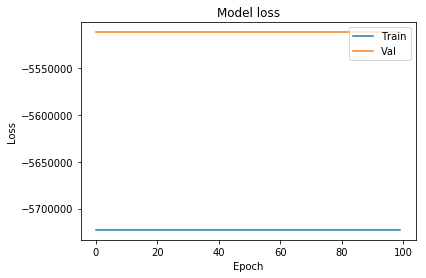

In [74]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()